In [2]:
import torch
import pandas as pd

In [3]:
mu = torch.tensor([-1.0, 1.1, 4.3, 2.2])
sigma = torch.tensor([.8, .8, .8, .8])
n = torch.tensor([40, 50, 30, 50])
y_i = torch.concat([
    torch.distributions.Normal(loc=mu[i], scale=sigma[i]).sample([n[i]]) for i in range(len(n))])
z_i = torch.tensor([0, 1, 2, 3]).repeat_interleave(n)

In [15]:
df = pd.DataFrame({'y_i': y_i, 'z_i': z_i}).sample(frac=1).reset_index(drop=True)
df.to_csv('gmm_1d.csv', index=False)

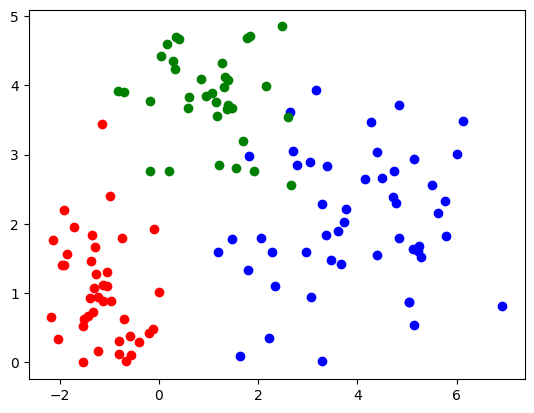

In [67]:
mu = torch.tensor([
    [-1.0, 1.1],
    [4.3, 2.2],
    [1.0, 3.7]])

scales_ = torch.tensor([0.4, 1.0, 0.6])
sigma = torch.tensor([
    [[1.0, 0.0],[0.0, 1.0]],
    [[1.4, 2.2],[0.0, 1.0]],
    [[1.0, 0.0],[0.2, 1.0]],
    ])
sigma[0,:] = scales_[0] * sigma[0,:]
sigma[1,:] = scales_[1] * sigma[1,:]
sigma[2,:] = scales_[2] * sigma[2,:]
n = torch.tensor([40, 50, 35])

y_i = torch.concat([
    torch.distributions.MultivariateNormal(loc=mu[i], covariance_matrix=sigma[i]).sample([n[i]]) for i in range(len(n))])

z_i = torch.arange(0, len(n)).repeat_interleave(n)

fig, ax = plt.subplots()
for c_idx, c in enumerate(('red','blue','green')):
    y_p = y_i[z_i[:]==c_idx, :]
    ax.scatter(y_p[:,0], y_p[:,1], c=c)

In [73]:
df2 = pd.DataFrame({'x_i': y_i[:,0], 'y_i': y_i[:,1], 'z_i': z_i})
df2.to_csv('gmm_2d.csv', index=False)